In [2]:
import sys
import pandas as pd
import numpy as np

if ".." not in sys.path:
    sys.path.append("..")

from utils.const import (
    ALL_VARS,
    INTEREST_VARS,
    VARIABLE_COLORS,
    ALL_ZONES,
    COMPLETE_DATASETS_PATH,
    SELECTED_ZONES,
)
from utils.plotting import (
    plot_series,
    box_plot,
    hist_plot,
    data_exploration,
)
from utils.stats import (
    print_variable_info,
    describe_variables,
    filter_final_data,
)

from utils.preprocessing import (
    mfill,
    date_fill,
)

## Imputacion Fechas

In [2]:
# Se crea un diccionario donde se contengan todos los df de zonas elegidas
zone_df: dict[str, pd.DataFrame] = dict()

for zone_path in COMPLETE_DATASETS_PATH:
    zone = zone_path.split("/")[-1].split(".")[0].split("_")[0]

    zone_df.update({zone: pd.read_csv(zone_path, parse_dates=["date"])})

In [3]:
start_period = "2020-01-01 00:00:00"
end_period = "2023-08-17 23:00:00"

dfs_date_filled = {
    zone: date_fill(df, start_period, end_period) for zone, df in zone_df.items()
}

dfs_date_filled.get("CENTRO")

                     date
659   2020-01-28 11:00:00
666   2020-01-28 18:00:00
2430  2020-04-11 06:00:00
3548  2020-05-27 20:00:00
3830  2020-06-08 14:00:00
4218  2020-06-24 18:00:00
4357  2020-06-30 13:00:00
8502  2020-12-20 06:00:00
11385 2021-04-19 09:00:00
27307 2023-02-11 19:00:00
                     date
659   2020-01-28 11:00:00
666   2020-01-28 18:00:00
2430  2020-04-11 06:00:00
3548  2020-05-27 20:00:00
3830  2020-06-08 14:00:00
4218  2020-06-24 18:00:00
4357  2020-06-30 13:00:00
8502  2020-12-20 06:00:00
11385 2021-04-19 09:00:00
27307 2023-02-11 19:00:00
                     date
659   2020-01-28 11:00:00
666   2020-01-28 18:00:00
2430  2020-04-11 06:00:00
3548  2020-05-27 20:00:00
3830  2020-06-08 14:00:00
4218  2020-06-24 18:00:00
4357  2020-06-30 13:00:00
8502  2020-12-20 06:00:00
11385 2021-04-19 09:00:00
27307 2023-02-11 19:00:00
                     date
659   2020-01-28 11:00:00
666   2020-01-28 18:00:00
2430  2020-04-11 06:00:00
3548  2020-05-27 20:00:00
3830  2020-0

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,86.34,60.91,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,NaN,NaN,6.5,9.8,19.0,112.01,85.64,713.6,0.0,91.0,NaN,0.158,10.49,3.7,2.0
2,2020-01-01 02:00:00,NaN,NaN,5.6,8.8,18.0,100.01,72.39,712.8,0.0,91.0,NaN,0.156,10.51,1.9,144.0
3,2020-01-01 03:00:00,3.22,3.2,7.2,10.4,14.0,106.20,70.25,712.4,0.0,92.0,2.9,0.158,10.64,2.7,28.0
4,2020-01-01 04:00:00,3.26,4.7,10.6,15.3,5.0,141.86,93.72,712.0,0.0,92.0,3.3,0.163,10.73,2.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,2023-08-17 19:00:00,0.57,3.6,10.8,14.6,37.0,48.00,13.26,708.9,0.0,19.0,3.5,0.030,36.24,15.1,68.0
31796,2023-08-17 20:00:00,0.59,2.9,14.0,17.1,31.0,44.00,11.99,709.3,0.0,21.0,2.6,0.002,35.08,13.2,80.0
31797,2023-08-17 21:00:00,0.61,2.7,15.7,18.6,26.0,47.00,13.26,709.8,0.0,22.0,2.5,0.000,34.23,8.7,100.0
31798,2023-08-17 22:00:00,0.62,2.5,11.9,14.7,28.0,48.00,11.72,710.2,0.0,25.0,2.4,0.000,33.61,8.8,111.0


## Excluir valores Extremos

In [4]:
dfs_non_atypical: dict[str, pd.DataFrame] = dict()

for zone, df in dfs_date_filled.items():
    df_ = df.copy()
    for var in df_.drop("date", axis=1).copy():
        mean = df_[var].mean()
        std = df_[var].std()

        upper_threshold = mean + 3 * std
        lower_threshold = mean - 3 * std

        df_[var] = np.where(
            (df_[var] > upper_threshold) | (df_[var] < lower_threshold),
            np.nan,
            df_[var],
        )

    print(f"===== {zone} =====")
    print(
        f"Atypical Values Excluded:\n{df_.isna().sum() - dfs_date_filled.get(zone).isna().sum()}\n"
    )

    dfs_non_atypical.update({zone: df_})


dfs_non_atypical.get("NORTE2")

===== NORTE2 =====
Atypical Values Excluded:
date       0
CO       302
NO       471
NO2      460
NOX      425
O3       300
PM10     431
PM2.5    272
PRS      203
RAINF    132
RH         0
SO2      384
SR         1
TOUT     118
WSR      273
WDR      474
dtype: int64

===== NOROESTE2 =====
Atypical Values Excluded:
date       0
CO       240
NO       411
NO2      401
NOX      457
O3       449
PM10     394
PM2.5    411
PRS      189
RAINF      6
RH         0
SO2       39
SR        13
TOUT      96
WSR       30
WDR        0
dtype: int64

===== SURESTE3 =====
Atypical Values Excluded:
date       0
CO       233
NO       712
NO2      630
NOX      768
O3       304
PM10     582
PM2.5    420
PRS      197
RAINF     63
RH         0
SO2      577
SR         2
TOUT      68
WSR      350
WDR        0
dtype: int64

===== CENTRO =====
Atypical Values Excluded:
date       0
CO       546
NO       620
NO2      448
NOX      645
O3       343
PM10     381
PM2.5    405
PRS      189
RAINF      0
RH         0
SO2   

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,69.0,62.0,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,0.60,0.5,NaN,NaN,NaN,49.0,NaN,715.6,0.00,92.0,18.6,0.000,11.20,6.3,30.0
2,2020-01-01 02:00:00,0.36,0.5,NaN,NaN,NaN,53.0,NaN,714.6,0.00,92.0,18.9,0.000,11.21,2.6,128.0
3,2020-01-01 03:00:00,0.44,0.5,NaN,NaN,NaN,51.0,38.0,714.2,0.00,92.0,19.1,0.000,11.36,2.6,79.0
4,2020-01-01 04:00:00,0.35,0.5,NaN,NaN,NaN,50.0,NaN,713.8,0.01,92.0,19.1,0.000,11.34,2.3,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,2023-08-17 19:00:00,1.13,9.1,24.3,33.4,27.0,53.0,18.0,709.8,0.00,19.0,3.5,0.078,37.87,8.5,83.0
31796,2023-08-17 20:00:00,1.08,7.5,24.3,31.9,23.0,44.0,8.0,710.2,0.00,20.0,3.2,0.001,36.21,10.4,68.0
31797,2023-08-17 21:00:00,1.29,8.2,28.6,36.9,17.0,45.0,5.0,710.6,0.00,21.0,2.9,0.000,35.49,8.4,70.0
31798,2023-08-17 22:00:00,1.10,9.4,26.9,36.3,19.0,50.0,7.0,711.2,0.00,27.0,3.2,0.000,34.34,9.8,91.0


## Imputación Datos Nulos

In [5]:
dfs_imputation: dict[str, pd.DataFrame] = dict()

for zone, df in dfs_non_atypical.items():
    df_ = df.copy()
    for var in df_.drop("date", axis=1).copy():
        df_[var] = mfill(df_[var])

    dfs_imputation.update({zone: df_})

dfs_imputation.get("NORTE2")

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,0.60,0.5,4.2,9.7,27.0,69.0,62.0,715.6,0.00,92.0,18.6,0.000,11.20,6.3,30.0
1,2020-01-01 01:00:00,0.60,0.5,4.2,9.7,27.0,49.0,50.0,715.6,0.00,92.0,18.6,0.000,11.20,6.3,30.0
2,2020-01-01 02:00:00,0.36,0.5,4.2,9.7,27.0,53.0,44.0,714.6,0.00,92.0,18.9,0.000,11.21,2.6,128.0
3,2020-01-01 03:00:00,0.44,0.5,4.2,9.7,27.0,51.0,38.0,714.2,0.00,92.0,19.1,0.000,11.36,2.6,79.0
4,2020-01-01 04:00:00,0.35,0.5,4.2,9.7,27.0,50.0,25.0,713.8,0.01,92.0,19.1,0.000,11.34,2.3,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,2023-08-17 19:00:00,1.13,9.1,24.3,33.4,27.0,53.0,18.0,709.8,0.00,19.0,3.5,0.078,37.87,8.5,83.0
31796,2023-08-17 20:00:00,1.08,7.5,24.3,31.9,23.0,44.0,8.0,710.2,0.00,20.0,3.2,0.001,36.21,10.4,68.0
31797,2023-08-17 21:00:00,1.29,8.2,28.6,36.9,17.0,45.0,5.0,710.6,0.00,21.0,2.9,0.000,35.49,8.4,70.0
31798,2023-08-17 22:00:00,1.10,9.4,26.9,36.3,19.0,50.0,7.0,711.2,0.00,27.0,3.2,0.000,34.34,9.8,91.0


In [ ]:
for zone, df in dfs_imputation.items():
    df.to_csv(f"../../datos/cleaned_datasets/{zone}_2020_2023.csv", index=False)

## Gráficas de Distribución

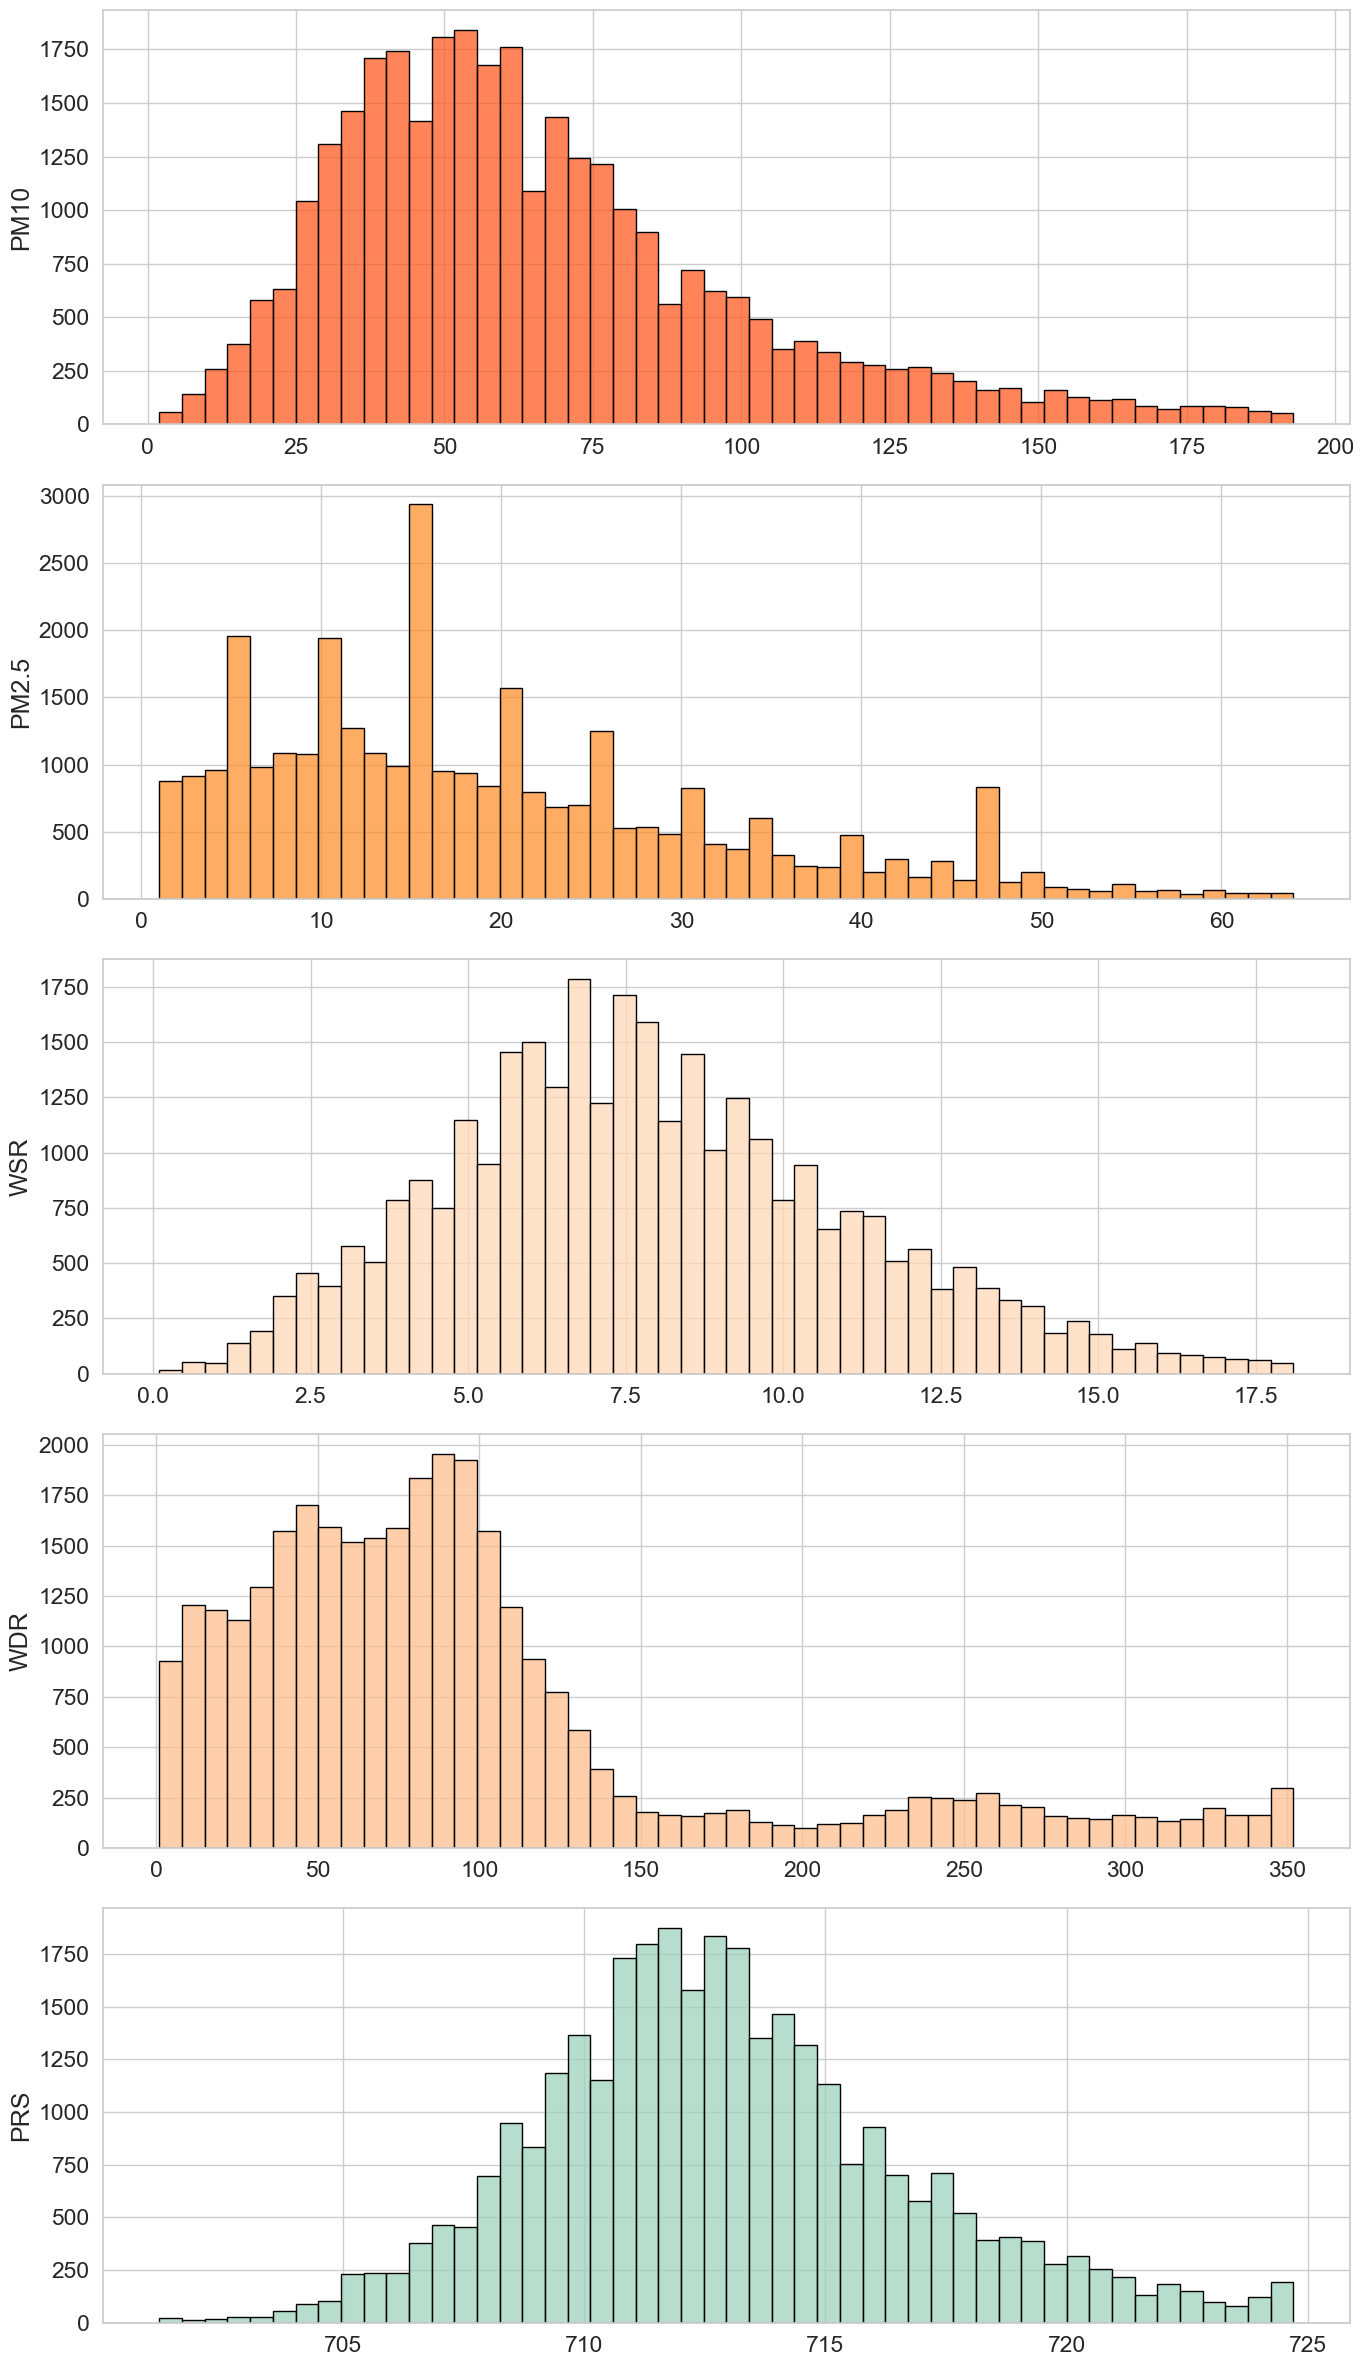

In [6]:
hist_plot(dfs_imputation.get("NORTE2"), interest_vars=INTEREST_VARS, title="")

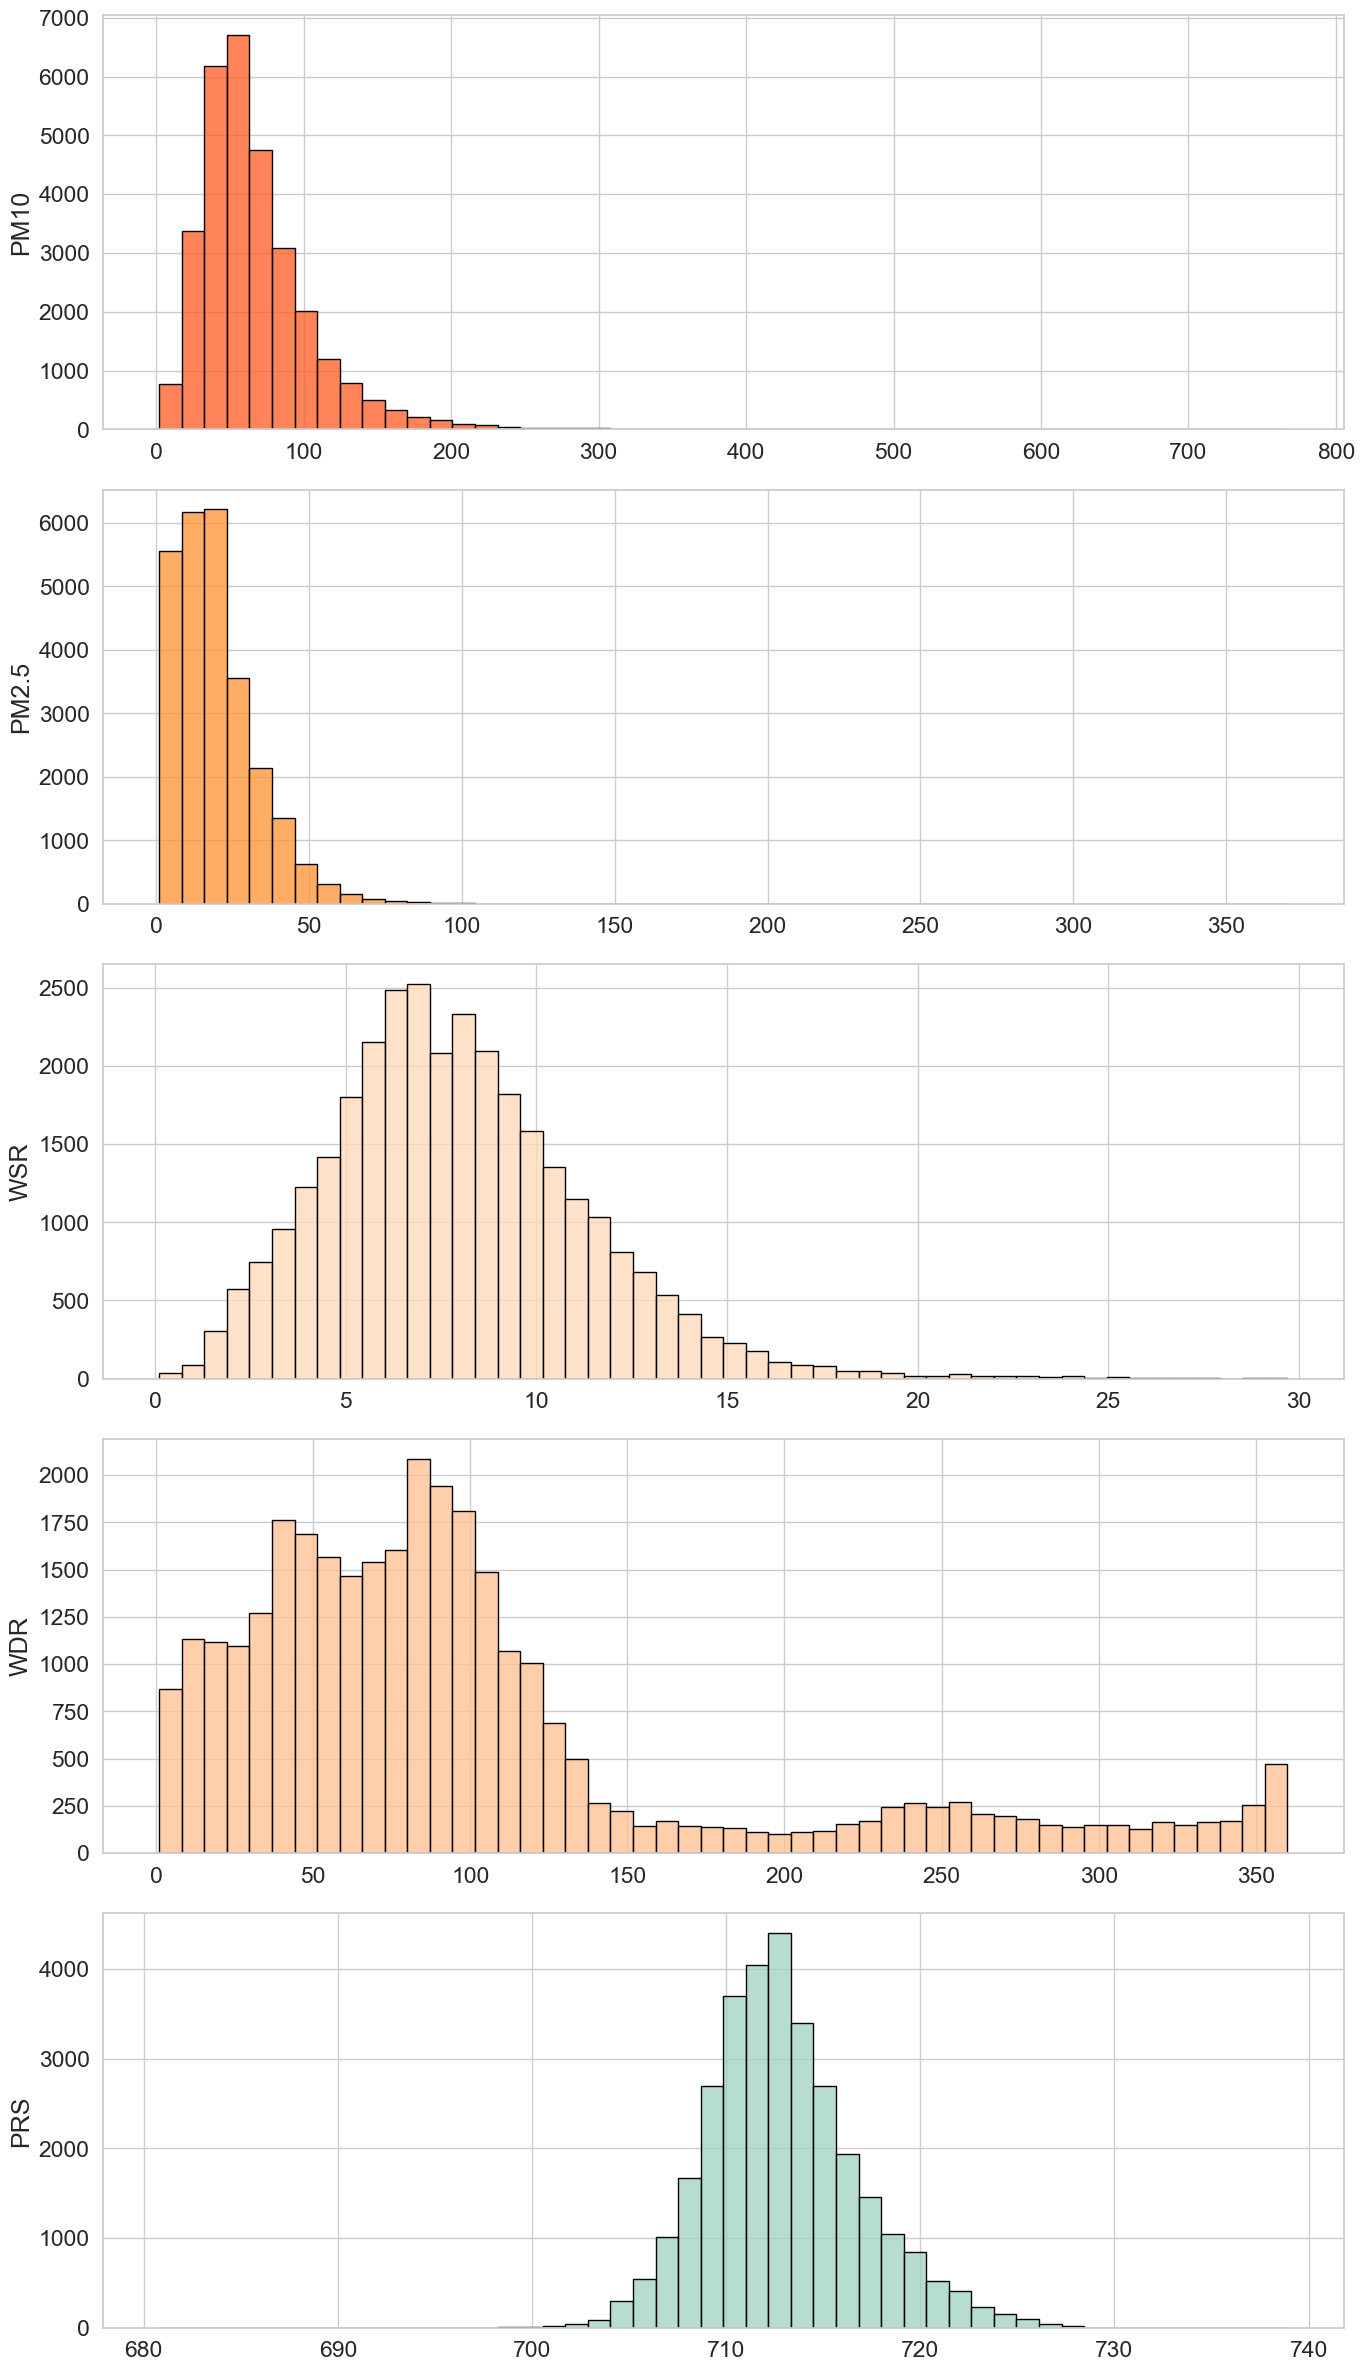

In [19]:
hist_plot(zone_df.get("NORTE2"), interest_vars=INTEREST_VARS, title="")

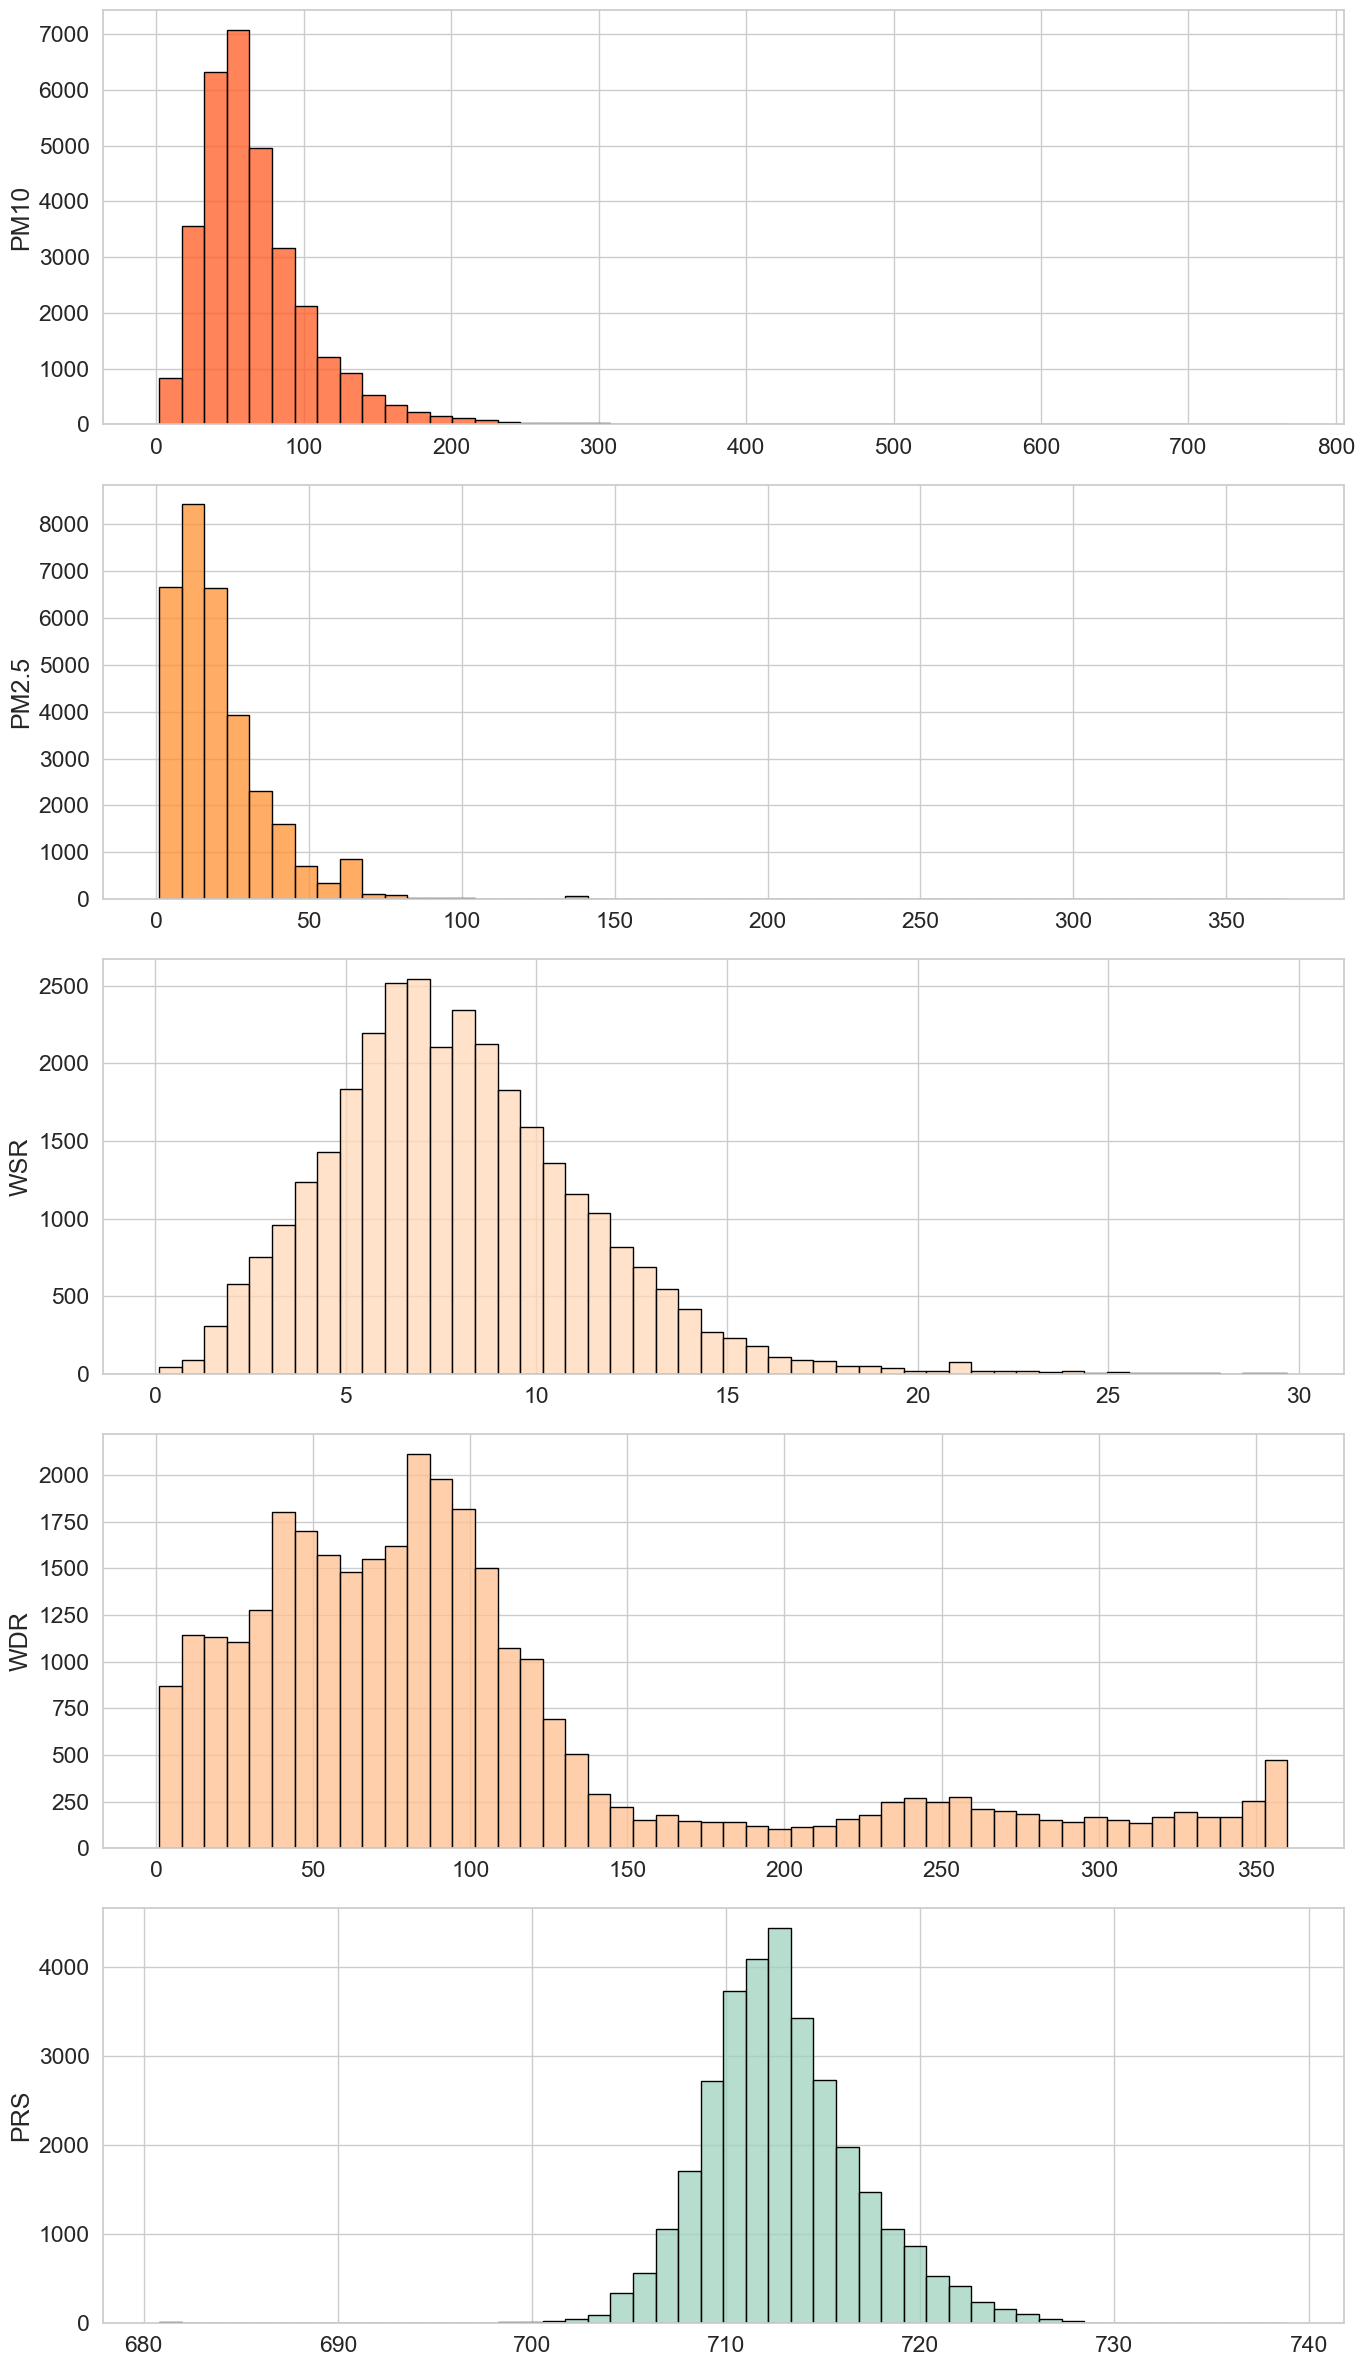

In [17]:
hist_plot(dfs_imputation.get("NORTE2"), interest_vars=INTEREST_VARS, title="")